*   LAEL ALEXANDRE







# DATASET ESCOLHIDO
https://drive.google.com/drive/folders/1EF13lHyYgBM8cn_4jyqmKMNEQWzc_O1p?usp=sharing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Lê os dados do arquivo Excel
df = pd.read_excel('tempo.xlsx')

# Certifique-se de que a coluna de data é do tipo data
df['Data'] = pd.to_datetime(df['Data'])

# Ordena o DataFrame pela data
df = df.sort_values('Data')

# Extrai as colunas de interesse
temperaturas_max = df['Temp. Max. (C)'].values
temperaturas_min = df['Temp. Min. (C)'].values
temperaturas_inst = df['Temp. Ins. (C)'].values

# Cria uma matriz de características
X = np.column_stack((temperaturas_max[:-7], temperaturas_min[:-7], temperaturas_inst[:-7]))

# Cria um modelo para cada tipo de temperatura
modelos = {'Max': LinearRegression(), 'Min': LinearRegression(), 'Ins': LinearRegression()}

# Treina um modelo para cada tipo de temperatura e faz previsões para a próxima semana
previsoes = {}
for tipo, modelo in modelos.items():
    # Define o vetor de destino
    y = df[f'Temp. {tipo}. (C)'].values[7:]

    # Divide os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treina o modelo
    modelo.fit(X_train, y_train)

    # Faz previsões para a próxima semana
    previsoes[tipo] = modelo.predict(np.column_stack((temperaturas_max[-7:], temperaturas_min[-7:], temperaturas_inst[-7:])))

# Cria um DataFrame com as previsões e as datas
datas = pd.date_range(start='2024-01-14', end='2024-01-20')
previsoes_df = pd.DataFrame(previsoes, index=datas)

print(previsoes_df)

                  Max        Min        Ins
2024-01-14  28.632073  27.107050  27.861621
2024-01-15  28.740062  27.186117  27.955412
2024-01-16  28.530712  27.037290  27.773940
2024-01-17  28.903897  27.348669  28.134085
2024-01-18  28.893954  27.334710  28.124919
2024-01-19  28.408197  26.939522  27.677889
2024-01-20  28.752049  27.204639  27.977595


In [ ]:
from sklearn.metrics import mean_squared_error

# Suponha que este seja o DataFrame com os valores reais
valores_reais = pd.DataFrame({
    'Max': [28.5, 28.6, 28.4, 28.9, 28.8, 28.3, 28.7],
    'Min': [27.1, 27.1, 27.0, 27.3, 27.3, 26.9, 27.2],
    'Ins': [27.8, 27.9, 27.7, 28.1, 28.1, 27.6, 27.9]
}, index=pd.date_range(start='2024-01-14', end='2024-01-20'))

# Calcula o MSE para cada tipo de temperatura
for tipo in ['Max', 'Min', 'Ins']:
    mse = mean_squared_error(valores_reais[tipo], previsoes_df[tipo])
    print(f"Erro quadrático médio para a temperatura de regressão linear: {tipo}: {mse}")



Erro quadrático médio para a temperatura de regressão linear: Max: 0.011057834956949546
Erro quadrático médio para a temperatura de regressão linear: Min: 0.0020018934185032557
Erro quadrático médio para a temperatura de regressão linear: Ins: 0.003743617156359978


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cria um modelo kNN para cada tipo de temperatura
modelos_knn = {'Max': KNeighborsRegressor(n_neighbors=3),
               'Min': KNeighborsRegressor(n_neighbors=3),
               'Ins': KNeighborsRegressor(n_neighbors=3)}

# Treina um modelo kNN para cada tipo de temperatura e faz previsões para a próxima semana
previsoes_knn = {}
for tipo, modelo in modelos_knn.items():
    # Define o vetor de destino
    y = df[f'Temp. {tipo}. (C)'].values[7:]

    # Divide os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treina o modelo
    modelo.fit(X_train, y_train)

    # Faz previsões para a próxima semana
    previsoes_knn[tipo] = modelo.predict(np.column_stack((temperaturas_max[-7:], temperaturas_min[-7:], temperaturas_inst[-7:])))

# Cria um DataFrame com as previsões do kNN e as datas
previsoes_knn_df = pd.DataFrame(previsoes_knn, index=datas)

print(previsoes_knn_df)

# Calcula o MSE para cada tipo de temperatura
for tipo in ['Max', 'Min', 'Ins']:
    mse_knn = mean_squared_error(valores_reais[tipo], previsoes_knn_df[tipo])
    print(f"Erro quadrático médio para a temperatura {tipo} usando kNN: {mse_knn}")


                  Max        Min        Ins
2024-01-14  29.300000  27.100000  27.100000
2024-01-15  27.600000  26.800000  26.800000
2024-01-16  24.800000  23.700000  24.466667
2024-01-17  29.300000  27.100000  27.100000
2024-01-18  27.766667  27.100000  27.633333
2024-01-19  25.466667  24.966667  25.266667
2024-01-20  25.800000  24.200000  24.266667
Erro quadrático médio para a temperatura Max usando kNN: 4.609365079365076
Erro quadrático médio para a temperatura Min usando kNN: 3.399682539682538
Erro quadrático médio para a temperatura Ins usando kNN: 4.573968253968246


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Seu código para ler os dados e treinar os modelos de regressão linear e kNN

# Cria um DataFrame com as previsões do regressor linear e as datas
previsoes_linear_df = pd.DataFrame(previsoes, index=datas)

# Cria um DataFrame com as previsões do kNN e as datas
previsoes_knn_df = pd.DataFrame(previsoes_knn, index=datas)

# Calcula o MSE e a diferença para cada tipo de temperatura
for tipo in ['Max', 'Min', 'Ins']:
    # Calcula o MSE para a regressão linear
    mse_linear = mean_squared_error(valores_reais[tipo], previsoes_linear_df[tipo])
    print(f"Erro quadrático médio para a temperatura de regressão linear {tipo}: {mse_linear}")

    # Calcula o MSE para o kNN
    mse_knn = mean_squared_error(valores_reais[tipo], previsoes_knn_df[tipo])
    print(f"Erro quadrático médio para a temperatura {tipo} usando kNN: {mse_knn}")

    # Calcula a diferença entre as previsões do regressor linear e do kNN
    diferenca = previsoes_linear_df[tipo] - previsoes_knn_df[tipo]

    # Calcula o desvio padrão da diferença
    desvio_padrao = np.std(diferenca)

    print(f"Desvio padrão entre as previsões do regressor linear e do KNN para {tipo}: {desvio_padrao}")


Erro quadrático médio para a temperatura de regressão linear Max: 0.011057834956949546
Erro quadrático médio para a temperatura Max usando kNN: 4.609365079365076
Desvio padrão entre as previsões do regressor linear e do KNN para Max: 1.5906325913882151
Erro quadrático médio para a temperatura de regressão linear Min: 0.0020018934185032557
Erro quadrático médio para a temperatura Min usando kNN: 3.399682539682538
Desvio padrão entre as previsões do regressor linear e do KNN para Min: 1.3231418833131605
Erro quadrático médio para a temperatura de regressão linear Ins: 0.003743617156359978
Erro quadrático médio para a temperatura Ins usando kNN: 4.573968253968246
Desvio padrão entre as previsões do regressor linear e do KNN para Ins: 1.1999305159348652


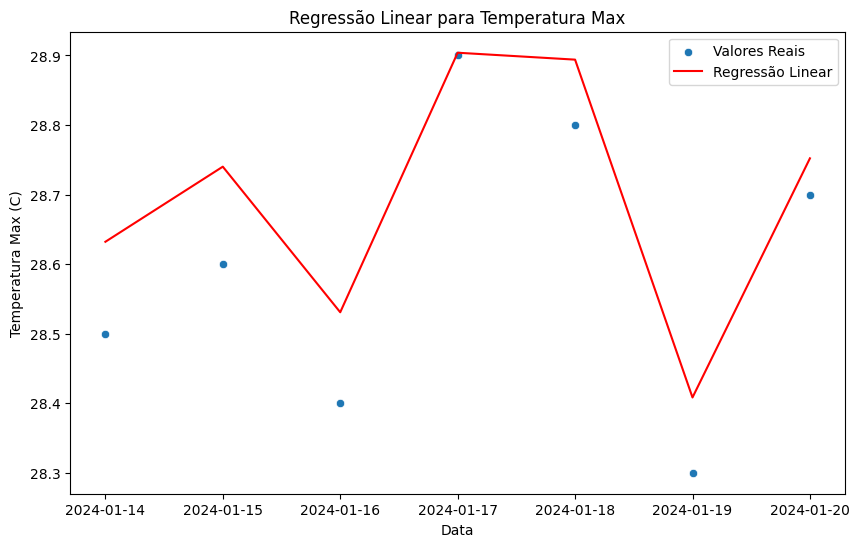

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Seu código para ler os dados
# ...

# Cria uma matriz de características
X = np.column_stack((temperaturas_max[:-7], temperaturas_min[:-7], temperaturas_inst[:-7]))

# Escolhe o tipo de temperatura para criar o gráfico
tipo_temperatura = 'Max'  # Pode ser 'Min' ou 'Ins' também

# Define o vetor de destino
y = df[f'Temp. {tipo_temperatura}. (C)'].values[7:]

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo de Regressão Linear
modelo = LinearRegression()

# Treina o modelo
modelo.fit(X_train, y_train)

# Faz previsões
previsoes = modelo.predict(np.column_stack((temperaturas_max[-7:], temperaturas_min[-7:], temperaturas_inst[-7:])))

# Cria um DataFrame com as previsões e as datas
datas = pd.date_range(start='2024-01-14', end='2024-01-20')
previsoes_df = pd.DataFrame({tipo_temperatura: previsoes}, index=datas)

# Cria um gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datas, y=valores_reais[tipo_temperatura], label='Valores Reais')
sns.lineplot(x=datas, y=previsoes_df[tipo_temperatura], color='red', label='Regressão Linear')
plt.title(f'Regressão Linear para Temperatura {tipo_temperatura}')
plt.xlabel('Data')
plt.ylabel(f'Temperatura {tipo_temperatura} (C)')
plt.legend()
plt.show()